In [ ]:
# 引入函式庫
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols

1.1Assume that we have received the new data for the year 2019
(Dengue_y2019_.csv). Please load the new dataset and merge it with the data from
other years (Dengue_y2008_2018.csv).

In [ ]:
import pandas as pd

# Load the datasets
df_2008_2018 = pd.read_csv('Dengue_y2008_2018.csv', sep=',')
df_2019 = pd.read_csv('Dengue_y2019_.csv', sep=',')

# Merge the datasets
merged_df = pd.concat([df_2008_2018, df_2019], ignore_index=True)


# Display the merged dataset
print(merged_df.head())

# Display the entire merged dataset
print(merged_df)



   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0
     YEAR  MONTH        MIN        MAX   HUMIDITY    RAINFALL  DENGUE
0    2010      1  11.341161  24.549217  78.661751    0.000922     0.0
1    2009     12  13.732589  26.410247  79.276498    0.000922     0.0
2    2014     12  14.105000  25.980369  82.176959    0.001843    11.0
3    2008     12  15.921232  26.389862  83.570507    0.001843     0.0
4    2014      1  12.127849  24.829401  79.981567    0.003687    15.0
..    ...    ...        ...        ...        ...         ...     ...
132  2018      5  23.849552  32.017304  78.580927  429.677419    52.0
133  2018      6  25.919038  28.062791  82.3

1.2Check the dataset for any missing values (NAs). If there are any observations
containing NAs, display the entire observation and then remove it.

In [ ]:
# 計算整個DataFrame中NaN的數量
print(merged_df.isnull().sum().sum())
# Check for missing values
na_rows = merged_df[merged_df.isna().any(axis=1)]

if not na_rows.empty:
    print("Rows with missing values:")
    print(na_rows)

    # Drop rows with missing values
    merged_df.dropna(inplace=True)

# Display the merged dataset
print(merged_df.head())

print("Merged dataset after dropping NA rows:")
print(merged_df)

2
Rows with missing values:
    YEAR  MONTH        MIN  MAX   HUMIDITY  RAINFALL  DENGUE
40  2009     12  18.888888  NaN  78.888888  0.888888     NaN
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0
Merged dataset after dropping NA rows:
     YEAR  MONTH        MIN        MAX   HUMIDITY    RAINFALL  DENGUE
0    2010      1  11.341161  24.549217  78.661751    0.000922     0.0
1    2009     12  13.732589  26.410247  79.276498    0.000922     0.0
2    2014     12  14.105000  25.980369  82.176959    0.001843    11.0
3    2008     12  15.921232  26.389862  83.570507    0.001843     0.0
4    2014      1  12.127849  24.829401  79.981567    0.003687    

1.3Are there any duplicate observations? If any duplicates exist, keep only one
instance of the duplicated observation and remove the rest.

In [ ]:
# Check for duplicate observations
duplicate_rows = merged_df[merged_df.duplicated()]

# Display duplicate observations
if not duplicate_rows.empty:
    print("\nDuplicate observations:")
    print(duplicate_rows)

    # Remove duplicate observations
    merged_df = merged_df.drop_duplicates()

    print("\nDuplicate observations removed. Updated dataset:")
    print(merged_df.head())
else:
    print("\nNo duplicate observations found in the dataset.")



Duplicate observations:
    YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
37  2008      2  13.658286  26.383448  72.602956  0.687685     0.0
48  2008      1  12.993929  25.059539  78.824885  1.286636     0.0

Duplicate observations removed. Updated dataset:
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


1.4. [10 pts] Create a new column called "SEASON", where Dec.-Feb. is winter, Mar.-May
is spring, Jun.-Aug. is summer, and Sep.-Nov. is fall. Then, group the data by season to
sum the “DENGUE” values.

In [ ]:
# Create a new column "SEASON" based on the month
merged_df['SEASON'] = merged_df['MONTH'].map({1: 'Winter', 2: 'Winter', 3: 'Spring',4: 'Spring', 5: 'Spring', 6: 'Summer',7: 'Summer', 8: 'Summer', 9: 'Fall',10: 'Fall', 11: 'Fall', 12: 'Winter'})


<ipython-input-6-23f27e3b8ddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['SEASON'] = merged_df['MONTH'].map({1: 'Winter', 2: 'Winter', 3: 'Spring',4: 'Spring', 5: 'Spring', 6: 'Summer',7: 'Summer', 8: 'Summer', 9: 'Fall',10: 'Fall', 11: 'Fall', 12: 'Winter'})


In [ ]:

# Group the data by season and sum the "DENGUE" values
seasonal_dengue_sum = merged_df.groupby('SEASON')['DENGUE'].sum().reset_index()

# Display the dataset with the new "SEASON" column
print("\nDataset with the new 'SEASON' column:")
print(merged_df.head())

# Display the sum of "DENGUE" values grouped by season
print("\nSum of 'DENGUE' values grouped by season:")
print(seasonal_dengue_sum)


Dataset with the new 'SEASON' column:
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE  SEASON
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0  Winter
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0  Winter
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0  Winter
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0  Winter
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0  Winter

Sum of 'DENGUE' values grouped by season:
   SEASON   DENGUE
0    Fall  16298.0
1  Spring    515.0
2  Summer  10537.0
3  Winter   1002.0


In [ ]:
# Create a new column "SEASON" based on the month
merged_df['SEASON'] = merged_df['MONTH'].map({1: 'Winter', 2: 'Winter', 3: 'Spring',
                                              4: 'Spring', 5: 'Spring', 6: 'Summer',
                                              7: 'Summer', 8: 'Summer', 9: 'Fall',
                                              10: 'Fall', 11: 'Fall', 12: 'Winter'})


<ipython-input-8-380130c6030a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['SEASON'] = merged_df['MONTH'].map({1: 'Winter', 2: 'Winter', 3: 'Spring',


1.5. [5 pts] Convert columns “YEAR”, “MONTH” and “SEASON” to factor in R and
categorical in Python.

In [ ]:
# Convert "YEAR" and "MONTH" to categorical
merged_df['YEAR'] = merged_df['YEAR'].astype('category')
merged_df['MONTH'] = merged_df['MONTH'].astype('category')

# Convert "SEASON" to categorical
merged_df['SEASON'] = merged_df['SEASON'].astype('category')

# Display the dataset with updated data types
print(merged_df.dtypes)


YEAR        category
MONTH       category
MIN          float64
MAX          float64
HUMIDITY     float64
RAINFALL     float64
DENGUE       float64
SEASON      category
dtype: object


1.6. [10 pts] For continuous variables, create density plots to understand the distribution of the data.

2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019     2
Name: YEAR, dtype: int64


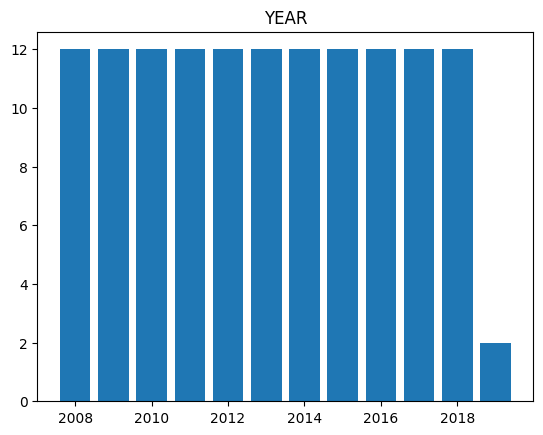

1     12
2     12
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
Name: MONTH, dtype: int64


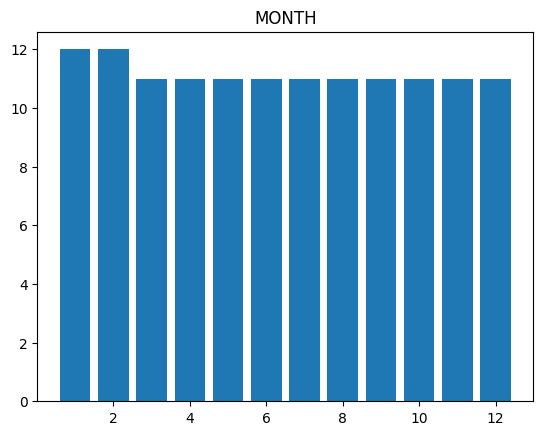

Winter    35
Fall      33
Spring    33
Summer    33
Name: SEASON, dtype: int64


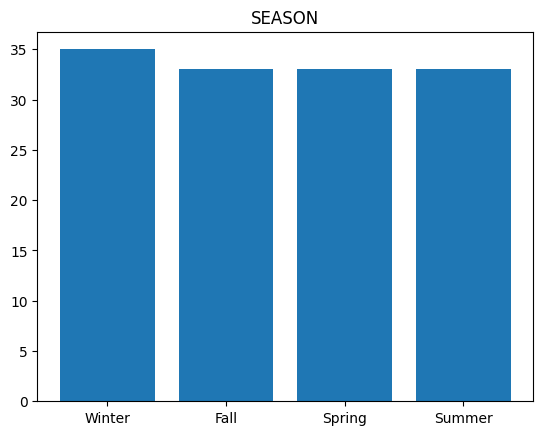

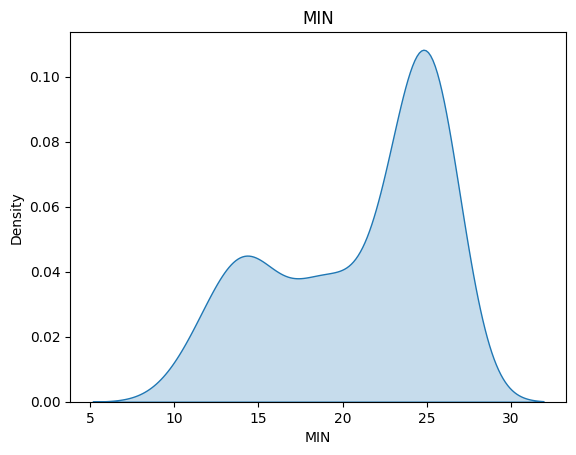

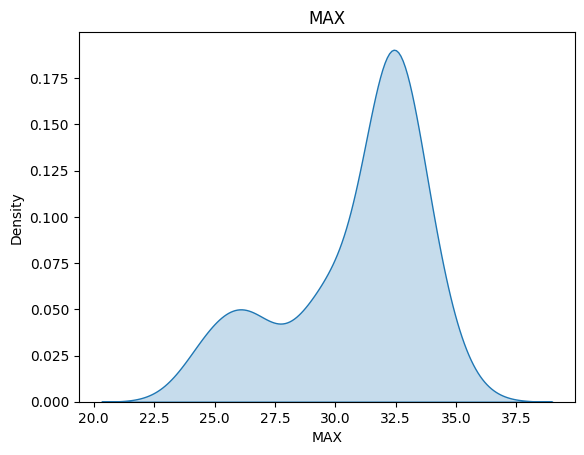

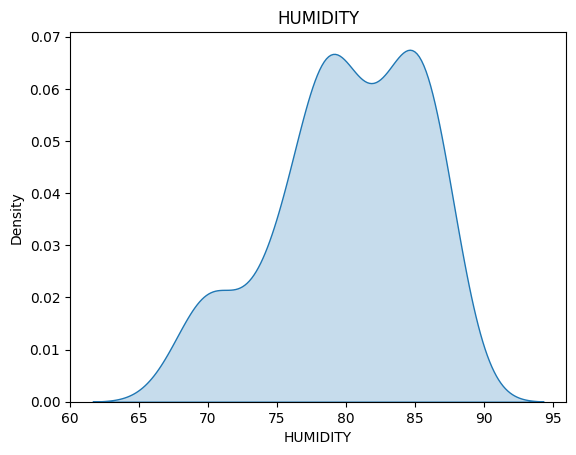

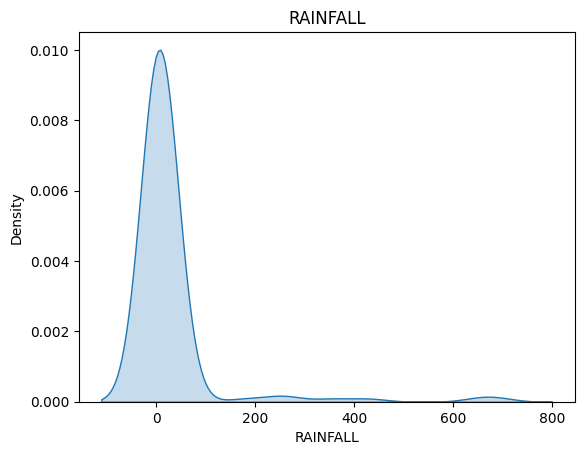

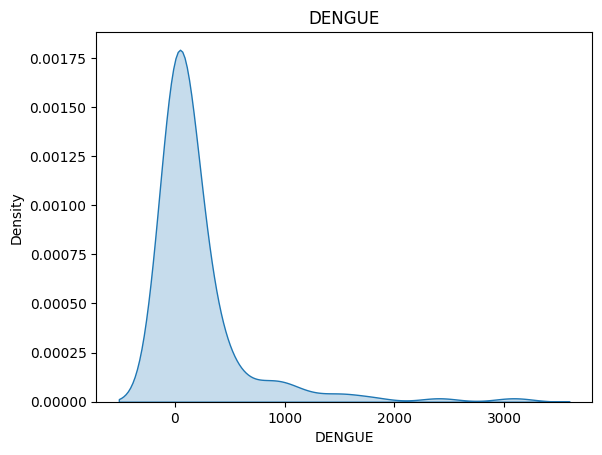

,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)"
1,"Text(0.5, 1.0, 'MIN')","Text(0.5, 1.0, 'MAX')","Text(0.5, 1.0, 'HUMIDITY')","Text(0.5, 1.0, 'RAINFALL')","Text(0.5, 1.0, 'DENGUE')"
2,None,None,None,None,None


In [ ]:
# Get numeric and categorical columns
num_cols = merged_df.select_dtypes(exclude='category').columns
cat_cols = merged_df.select_dtypes(include='category').columns
merged_df[cat_cols].apply(lambda x:(print(x.value_counts()),
                              plt.bar(x.value_counts().index, x.value_counts()),
                              plt.title(x.name),
                              plt.show()))
merged_df[num_cols].apply(lambda x:(sns.kdeplot(x, fill=True),
                              plt.title(x.name),
                              plt.show()))

1.7. [10 pts] Perform a series of bivariate analysis to check whether the continuous
variables are associated with the “DENGUE”.

                sum_sq     df          F    PR(>F)
MIN       2.458449e+06    1.0  13.181155  0.000403
Residual  2.461964e+07  132.0        NaN       NaN


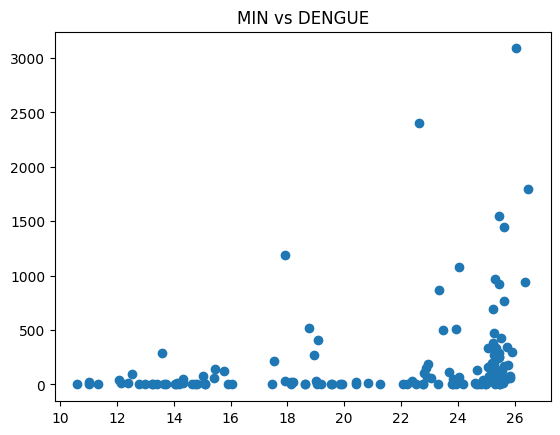

                sum_sq     df         F    PR(>F)
MAX       8.561205e+05    1.0  4.309666  0.039837
Residual  2.622196e+07  132.0       NaN       NaN


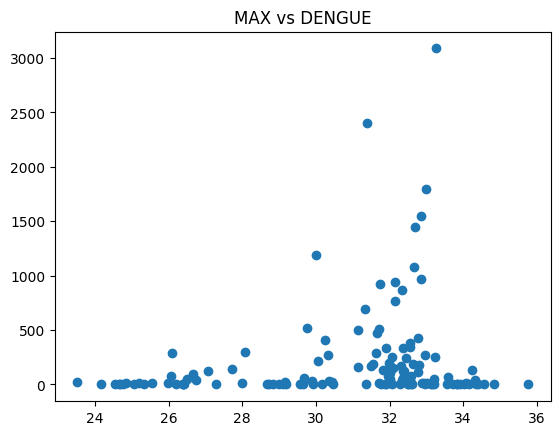

                sum_sq     df          F    PR(>F)
HUMIDITY  2.053186e+06    1.0  10.830035  0.001281
Residual  2.502490e+07  132.0        NaN       NaN


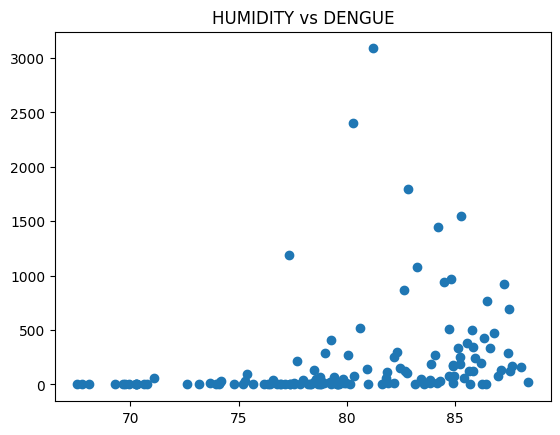

                sum_sq     df          F    PR(>F)
RAINFALL  3.680478e+06    1.0  20.763795  0.000012
Residual  2.339761e+07  132.0        NaN       NaN


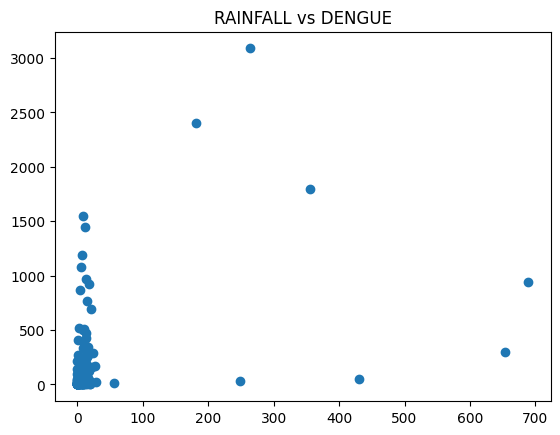

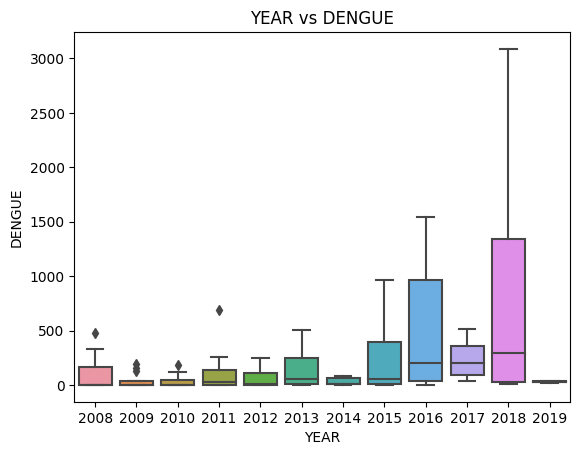

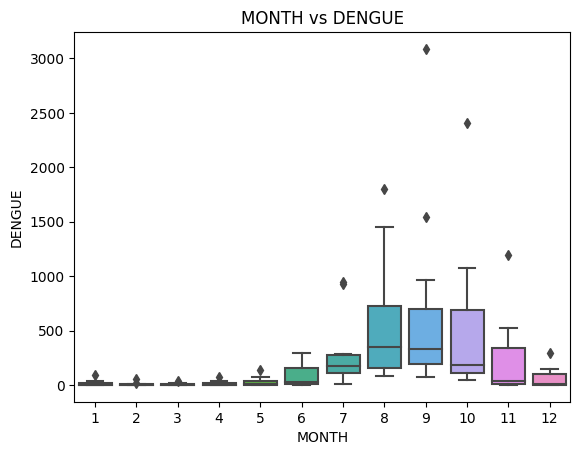

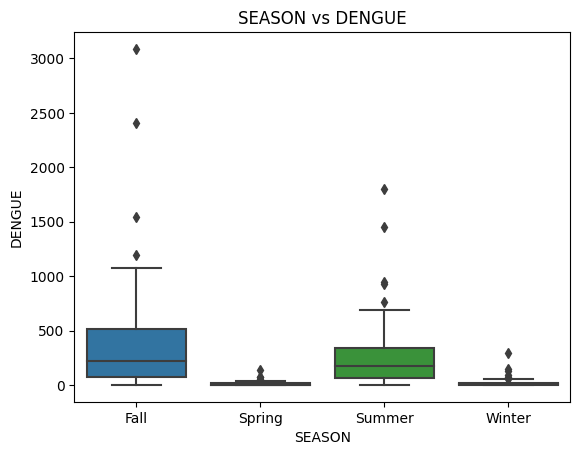

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# MIN analysis
formula_min = 'DENGUE ~ MIN'
model_min = ols(formula_min, data=merged_df).fit()
anova_table_min = sm.stats.anova_lm(model_min, typ=2)
print(anova_table_min)

if merged_df['MIN'].dtype == 'category':
    sns.boxplot(data=merged_df, x='MIN', y='DENGUE')
else:
    plt.scatter(data=merged_df, x='MIN', y='DENGUE')
plt.title('MIN vs DENGUE')
plt.show()

# MAX analysis
formula_max = 'DENGUE ~ MAX'
model_max = ols(formula_max, data=merged_df).fit()
anova_table_max = sm.stats.anova_lm(model_max, typ=2)
print(anova_table_max)

if merged_df['MAX'].dtype == 'category':
    sns.boxplot(data=merged_df, x='MAX', y='DENGUE')
else:
    plt.scatter(data=merged_df, x='MAX', y='DENGUE')
plt.title('MAX vs DENGUE')
plt.show()

# HUMIDITY analysis
formula_humidity = 'DENGUE ~ HUMIDITY'
model_humidity = ols(formula_humidity, data=merged_df).fit()
anova_table_humidity = sm.stats.anova_lm(model_humidity, typ=2)
print(anova_table_humidity)

if merged_df['HUMIDITY'].dtype == 'category':
    sns.boxplot(data=merged_df, x='HUMIDITY', y='DENGUE')
else:
    plt.scatter(data=merged_df, x='HUMIDITY', y='DENGUE')
plt.title('HUMIDITY vs DENGUE')
plt.show()

# RAINFALL analysis
formula_rainfall = 'DENGUE ~ RAINFALL'
model_rainfall = ols(formula_rainfall, data=merged_df).fit()
anova_table_rainfall = sm.stats.anova_lm(model_rainfall, typ=2)
print(anova_table_rainfall)

if merged_df['RAINFALL'].dtype == 'category':
    sns.boxplot(data=merged_df, x='RAINFALL', y='DENGUE')
else:
    plt.scatter(data=merged_df, x='RAINFALL', y='DENGUE')
plt.title('RAINFALL vs DENGUE')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create a boxplot for 'YEAR' vs 'DENGUE'
sns.boxplot(data=merged_df, x='YEAR', y='DENGUE')
plt.title('YEAR vs DENGUE')
plt.show()

# Create a boxplot for 'MONTH' vs 'DENGUE'
sns.boxplot(data=merged_df, x='MONTH', y='DENGUE')
plt.title('MONTH vs DENGUE')
plt.show()

# Create a boxplot for 'SEASON' vs 'DENGUE'
sns.boxplot(data=merged_df, x='SEASON', y='DENGUE')
plt.title('SEASON vs DENGUE')
plt.show()

In [ ]:
#calculate Pearson correlation as bivariate
def Pearson_correlation(X,Y):
  if len(X)==len(Y):
    Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
    Sum_x_squared = sum((X-X.mean())**2)
    Sum_y_squared = sum((Y-Y.mean())**2)
    corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr
print('MIN & DENGUE:',Pearson_correlation(merged_df['MIN'],merged_df['DENGUE']))
print('MAX & DENGUE:',Pearson_correlation(merged_df['MAX'],merged_df['DENGUE']))
print('HUMIDITY & DENGUE:',Pearson_correlation(merged_df['HUMIDITY'],merged_df['DENGUE']))
print('RAINFALL & DENGUE:',Pearson_correlation(merged_df['RAINFALL'],merged_df['DENGUE']))

MIN & DENGUE: 0.3061643067948857
MAX & DENGUE: 0.18552939446370575
HUMIDITY & DENGUE: 0.27855228112465846
RAINFALL & DENGUE: 0.3697645184996456


In [ ]:
merged_df.columns

Index(['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE'], dtype='object')

1.8. [5 pts] Write a function that computes Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming merged_df is your dataset
train_set, test_set = train_test_split(merged_df, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

def calculate_mae(y_true, y_pred):
    """
    Calculate Mean Absolute Error (MAE).

    Parameters:
    - y_true: Actual values
    - y_pred: Predicted values

    Returns:
    - MAE: Mean Absolute Error
    """
    mae = mean_absolute_error(y_true, y_pred)
    return mae

from sklearn.linear_model import LinearRegression

# Assuming features and target columns
features = ['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']
target = 'DENGUE'

# Train the linear regression model
your_model = LinearRegression()
your_model.fit(train_set[features], train_set[target])

# Make predictions on the test set
predicted_values = your_model.predict(test_set[features])

# Calculate Mean Absolute Error (MAE)
mae = calculate_mae(test_set[target], predicted_values)
print("Mean Absolute Error (MAE):", round(mae, 4))



Training set shape: (107, 8)
Testing set shape: (27, 8)
Mean Absolute Error (MAE): 272.0275


1.9. [5 pts] Please split the dataset into a training set (80%) and testing set (20%) with
random seed = 1.

In [ ]:
# Split the dataset into training and testing sets
train, test = train_test_split(merged_df, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (107, 8)
Testing set shape: (27, 8)


1.10. [10 pts] Build linear models (at least two) with the training set, then report the
training and testing MAEs (round up to the fourth decimal digits), in terms of MAEs,
which model performs better? Explain your answer.

In [ ]:
import itertools
# Evaluate models on training and testing sets
def evaluate_model_mae(model, dataset, target):
    y_pred = model.predict(dataset)
    mae_value = mean_absolute_error(target, y_pred)
    return mae_value

# Define formulas
formula_select = 'DENGUE ~MAX+ MIN '
formula_all = 'DENGUE ~ YEAR + MONTH + MIN + MAX + HUMIDITY + RAINFALL + SEASON'

# Fit linear models
lm_select = ols(formula_select, data=train_set).fit()
lm_all = ols(formula_all, data=train_set).fit()

# Print summaries
print("\nModel Summary - Select Variables:")
print(lm_select.summary())

print("\nModel Summary - All Variables:")
print(lm_all.summary())

# Fit on the training set
tr_lm_select = ols(formula_select, data=train_set).fit()
tr_lm_all = ols(formula_all, data=train_set).fit()

# Print training set summaries
#print("\nTraining Set Summary - Select Variables:")
#print(tr_lm_select.summary())

#print("\nTraining Set Summary - All Variables:")
#print(tr_lm_all.summary())

# Create interaction terms
pairs = itertools.combinations(train_set.drop(['DENGUE'], axis=1).columns, 2)
int_terms = np.array(pd.Series(pairs).apply(lambda x: '{}:{}'.format(x[0], x[1])))
formula_all2way = formula_all + ' + ' + ' + '.join(int_terms)

# Fit model with interaction terms
tr_lm_all2way = ols(formula_all2way, data=train_set).fit()
#print("\nTraining Set Summary - All Variables with Interaction Terms:")
#print(tr_lm_all2way.summary())

# Evaluate models on training and testing sets
def evaluate_model(model, dataset, target):
    y_pred = model.predict(dataset)
    rmse_value = np.sqrt(np.mean((target - y_pred) ** 2))
    return rmse_value

# Evaluate models
print('\nModel Evaluation on Training Set:')
print('\nModel Evaluation on Testing Set:')
print('Select Model MAE:', evaluate_model_mae(tr_lm_select, test_set, test_set['DENGUE']))
print('All Model MAE:', evaluate_model_mae(tr_lm_all, test_set, test_set['DENGUE']))
print('All 2-way Model MAE:', evaluate_model_mae(tr_lm_all2way, test_set, test_set['DENGUE']))

# Determine which model performs better
if evaluate_model_mae(tr_lm_select, test_set, test_set['DENGUE']) < evaluate_model_mae(tr_lm_all, test_set, test_set['DENGUE']):
    print('Select Model MAE比較好，因為誤差值比較小')
else:
    print('All Model MAE比較好，因為誤差值比較小')
    # print('All Model MAE比較好，因為誤差值比較小')



Model Summary - Select Variables:
                            OLS Regression Results                            
Dep. Variable:                 DENGUE   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     7.670
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           0.000781
Time:                        14:22:26   Log-Likelihood:                -803.51
No. Observations:                 107   AIC:                             1613.
Df Residuals:                     104   BIC:                             1621.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    801.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assume 'features' are the predictor variables, and 'target' is the target variable
X_train = train_set[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y_train = train_set['DENGUE']

X_test = test_set[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y_test = test_set['DENGUE']

# Build linear models
model1 = LinearRegression()
model2 = LinearRegression()

# Fit models on the original features
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Make predictions on the training set
pred_train1 = model1.predict(X_train)
pred_train2 = model2.predict(X_train)

# Make predictions on the testing set
pred_test1 = model1.predict(X_test)
pred_test2 = model2.predict(X_test)

# Calculate Mean Absolute Error (MAE) for training and testing sets
mae_train1 = mean_absolute_error(y_train, pred_train1)
mae_test1 = mean_absolute_error(y_test, pred_test1)

mae_train2 = mean_absolute_error(y_train, pred_train2)
mae_test2 = mean_absolute_error(y_test, pred_test2)

# Display the MAE for each model
print("Model 1 - Training MAE:", round(mae_train1, 4))
print("Model 1 - Testing MAE:", round(mae_test1, 4))
print("Model 2 - Training MAE:", round(mae_train2, 4))
print("Model 2 - Testing MAE:", round(mae_test2, 4))

# 假設您希望嘗試其他特徵組合
X_train_model1 = train_set[['MIN', 'MAX']]
X_test_model1 = test_set[['MIN', 'MAX']]

# 建立新的 linear regression 模型
model1_updated = LinearRegression()
model1_updated.fit(X_train_model1, y_train)

# 進行預測
pred_train1_updated = model1_updated.predict(X_train_model1)
pred_test1_updated = model1_updated.predict(X_test_model1)

# 計算 MAE
mae_train1_updated = mean_absolute_error(y_train, pred_train1_updated)
mae_test1_updated = mean_absolute_error(y_test, pred_test1_updated)

# 顯示更新後模型的結果
print("\nUpdated Model 1 - Training MAE:", round(mae_train1_updated, 4))
print("Updated Model 1 - Testing MAE:", round(mae_test1_updated, 4))

# Display the conclusion
if mae_test1_updated < mae_test1:
    print("Model 1 (Updated) performs better on the testing set.")
else:
    print("Model 1 remains the better performer on the testing set.")


Model 1 - Training MAE: 229.8263
Model 1 - Testing MAE: 272.0275
Model 2 - Training MAE: 229.8263
Model 2 - Testing MAE: 272.0275

Updated Model 1 - Training MAE: 244.5591
Updated Model 1 - Testing MAE: 228.2146
Model 1 (Updated) performs better on the testing set.
